In [1]:
import pandas as pd
import numpy as np

In [2]:
from vega_datasets import data
sf_temps = data.sf_temps()

In [3]:
sf_temps

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00
...,...,...
8754,50.4,2010-12-31 19:00:00
8755,49.9,2010-12-31 20:00:00
8756,49.4,2010-12-31 21:00:00
8757,48.8,2010-12-31 22:00:00


1. Resample by the day and take the average temperature. Visualize the average temperature over time.

In [4]:
df = sf_temps.copy()

In [5]:
df.date = pd.to_datetime(df.date)

In [6]:
df.dtypes

temp           float64
date    datetime64[ns]
dtype: object

In [7]:
df = df.set_index('date').sort_index()

In [8]:
df_mean = df.resample('D').mean()

In [9]:
df_mean.head()

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='date'>

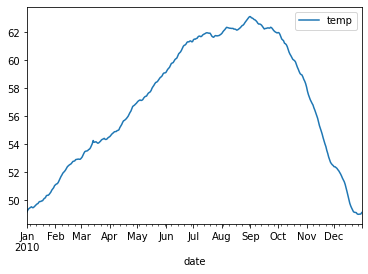

In [11]:
df_mean.plot()

<AxesSubplot:xlabel='date', ylabel='temp'>

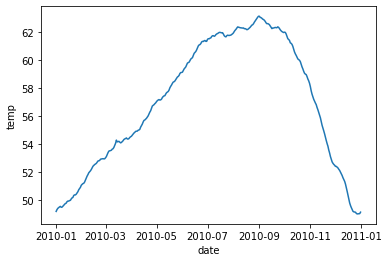

In [13]:
sns.lineplot(x=df_mean.index, y='temp', data=df_mean)

2. Write the code necessary to visualize the minimum temperature over time.

In [14]:
df_mins = df.resample('D').min()

<AxesSubplot:xlabel='date'>

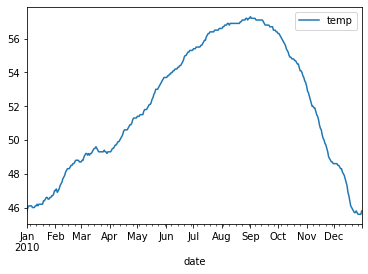

In [15]:
df_mins.plot()

3. Write the code necessary to visualize the maximum temperature over time.

In [16]:
df_maxs = df.resample('D').max()

<AxesSubplot:xlabel='date'>

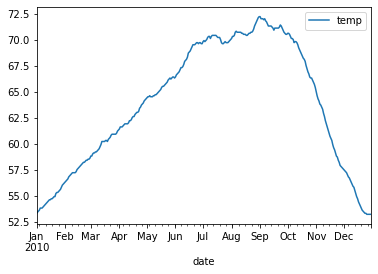

In [17]:
df_maxs.plot()

4. Which month is the coldest, on average?
5. Which month has the highest average temperature?

In [21]:
df_months = df.resample('M').mean()

In [38]:
df_months['month'] = df_months.index.month

In [39]:
df_months['month_name'] = df_months.index.month_name()

In [47]:
df_months.sort_values('temp')

,temp,month,month_name
date,,,
2010-01-31,49.984140,1,January
2010-12-31,50.498253,12,December
2010-02-28,52.243899,2,February
2010-03-31,53.956528,3,March
2010-11-30,55.185139,11,November
2010-04-30,55.633056,4,April
2010-05-31,57.970968,5,May
2010-10-31,60.253091,10,October
2010-06-30,60.444722,6,June


January is the coldest month on average, and September is the warmest on average.

6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [48]:
df_min_max = df.resample('D').agg(['min', 'max'])

In [52]:
df_min_max['range'] = (df_min_max.temp.max) - (df_min_max.temp.min)

TypeError: unsupported operand type(s) for -: 'method' and 'method'